# Project- Artificial Neural Networks: Street View Housing Number Digit Recognition

**Marks: 30**



Dear Learner,

Welcome to project on Classification using Artificial Neural Networks. We will work with the Street View Housing Numbers image dataset for this project work.

Do read the problem statement and the guidelines around the same.

----
### Context: 
-------

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

---------
### Objective:
------------
The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 

--------
### More about the dataset
------------
- The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

---------------------------
### Guidelines
-----------------------------------------
- You need to download the dataset from the given link and add it to your drive. Use colab for this exercise. 
- You will need to mount the drive and give proper path to read the dataset.
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!





### Mount the drive
Let us start by mounting the drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


### Load the dataset
- Let us now, load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [3]:
import h5py
import numpy as np

# Open the file as read only
h5f = h5py.File('/content/drive/My Drive/DS/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [4]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Visualising images (3 marks)
- Use X_train to visualise the first 10 images. (2 marks)
- Use Y_train to print the first 10 labels (1 mark)

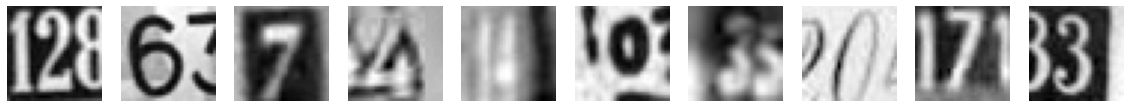

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [5]:
# visualizing the first 10 images in the dataset and their labels

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis('off')
plt.show()
# print labels
print('label for each of the above image: %s' % (y_train1[0:10]))

### Data preparation (9 marks)

- Print the first image in the train image and figure out the shape of the images (1 mark)
- Reshape the train and the test dataset to flatten them. Figure out the required shape (3 marks)
- Normalise the train and the test dataset by dividing by 255. (2 mark)
- Print the new shapes of the train and the test set. (1 mark)
- One hot encode the target variables (2 marks)

In [6]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [7]:
# Printing shape of training and test sets
print(X_train.shape, y_train1.shape, X_test.shape, y_test1.shape)

(42000, 32, 32) (42000,) (18000, 32, 32) (18000,)


In [8]:
np.unique(y_train1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [10]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

In [11]:
# New shape 

print('Training set:', X_train.shape, y_train1.shape)
print('Test set:', X_test.shape, y_test1.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [12]:
# one hot encode output

y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)


### Model Building (13 marks)
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with 256 nodes and relu activation
 - Second hidden layer with 64 nodes and relu activation 
 - Third hidden layer with 64 nodes and relu activation
 - 4th hidden layer with 32 nodes and relu activation
 - Output layer with softmax activation and no of nodes equal to the number of classes
- Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric
- do not fit the model here, just return the compiled model
- Call the model and fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1 and 30 epochs. Store the model building history to use it later for visualisation.
- print the summary of the model 


In [13]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers

def nn_model_1():
    # create model
    model = Sequential()  
   
    #First hidden layer with 256 nodes and relu activation
    model.add(Dense(256, activation='relu'))
    #Second hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))
    #Third hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))
    #4th hidden layer with 32 nodes and relu activation
    model.add(Dense(32,activation='relu'))
    #Output layer
    model.add(Dense(10, activation='softmax'))
    # Compile model
    # Categorical_crossentropy loss, adam optimizer (lr = 0.001) and accuracy metric
    adam = optimizers.Adam(lr=1e-3)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [14]:
# Build the model

# Call function here
model_1 = nn_model_1()

# Fit the model and store the history
# validation split = 0.2, batch size = 128, verbose = 1 and 30 epochs
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=30, verbose=1, batch_size=128)

Epoch 1/30
263/263 [==============================] - 1s 4ms/step - loss: 2.3057 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy: 0.0961
Epoch 2/30
263/263 [==============================] - 1s 3ms/step - loss: 2.2595 - accuracy: 0.1313 - val_loss: 2.2017 - val_accuracy: 0.1511
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 2.1407 - accuracy: 0.1735 - val_loss: 2.0996 - val_accuracy: 0.2031
Epoch 4/30
263/263 [==============================] - 1s 3ms/step - loss: 1.9805 - accuracy: 0.2654 - val_loss: 1.8084 - val_accuracy: 0.3306
Epoch 5/30
263/263 [==============================] - 1s 3ms/step - loss: 1.6622 - accuracy: 0.3964 - val_loss: 1.5773 - val_accuracy: 0.4457
Epoch 6/30
263/263 [==============================] - 1s 3ms/step - loss: 1.5016 - accuracy: 0.4747 - val_loss: 1.5493 - val_accuracy: 0.4493
Epoch 7/30
263/263 [==============================] - 1s 3ms/step - loss: 1.3769 - accuracy: 0.5334 - val_loss: 1.3062 - val_accuracy: 0.5607
Epoch 

In [15]:
#model summary here
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


### Plotting the validation and training accuracies (2 marks)

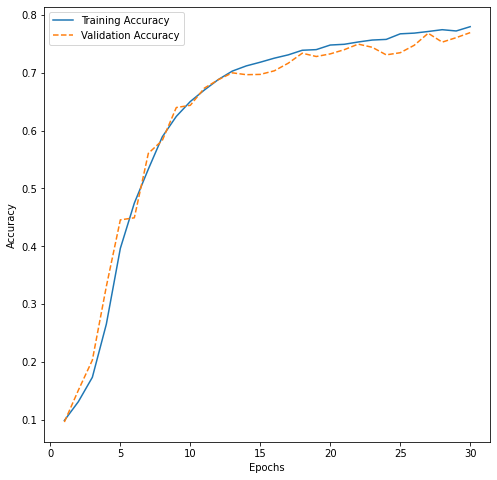

In [16]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['accuracy'], ls='-', label='Training Accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls='--', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Comments**
- Validation accuracy is close to training accuracy. The model performs well.
- More epochs could potentially be used, since the accuracy is continuing to improve for both the training data and the validation data.
- The loss plot below also shows a decrease in loss for training and validation sets.


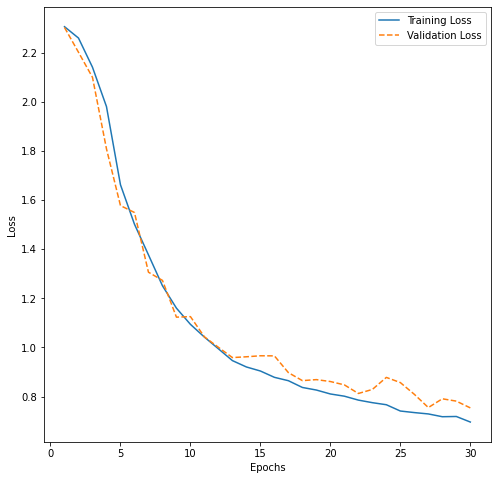

In [17]:
# plotting the loss

dict_hist = history_model_1.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['loss'], ls='-', label='Training Loss')
plt.plot(list_ep, dict_hist['val_loss'], ls='--', label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Test set prediction and final comments (3 marks)
- predict on the test set and comment on the results obtained. (3 marks)


In [18]:
# predict on the test dataset
test_pred = np.argmax(model_1.predict(X_test), axis=1)

#Print the classificatio report
from sklearn.metrics import classification_report
print(classification_report(y_test1, test_pred))



              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1814
           1       0.75      0.84      0.79      1828
           2       0.79      0.79      0.79      1803
           3       0.75      0.74      0.74      1719
           4       0.77      0.84      0.80      1812
           5       0.79      0.70      0.74      1768
           6       0.83      0.72      0.77      1832
           7       0.82      0.80      0.81      1808
           8       0.68      0.74      0.71      1812
           9       0.74      0.73      0.73      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



#### Comments:
- The model performs well. The F-1 scores are over 0.7 for most categories and accuracy score is 0.77.
- The confusion matrix below shows that the pairs 3 and 5, and 6 and 8 could be confused. The F-1 scores are also seen to be lower at 0.72 for 3 and 5.



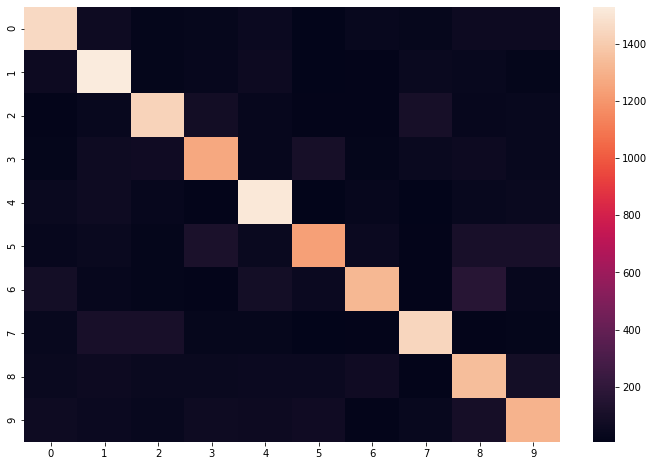

In [19]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test1, test_pred))


In [20]:
# Accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test1, test_pred)

0.7696666666666667

In [21]:
# Try a new model with different layers including Dropout  
# Note Dropout may not be useful here, as the model is not overfitting

from tensorflow.keras import losses, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

def nn_model_2():
    # create model
    model2 = Sequential()  
   
    #First hidden layer with 256 nodes and relu activation
    model2.add(Dense(256, activation='relu'))
    #Second hidden layer with 128 nodes and relu activation
    model2.add(Dense(128, activation='relu'))
    #Dropout layer 
    model2.add(Dropout(0.2))
    #Third hidden layer with 64 nodes and relu activation
    model2.add(Dense(64, activation='relu'))
    #4th hidden layer with 32 nodes and relu activation
    model2.add(Dense(32,activation='relu'))
    #Dropout layer
    model2.add(Dropout(0.2))
    #Output layer
    model2.add(Dense(10, activation='softmax'))
    # Compile model
    # Categorical_crossentropy loss, adam optimizer (lr = 0.001) and accuracy metric
    adam = optimizers.Adam(lr=1e-3)
    model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model2

In [22]:
# new model 2
model2 = nn_model_2()


In [23]:
# Early stopping based on validation loss
estopp = EarlyStopping(monitor='val_loss', patience=3)

# Fit
history_model_2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
263/263 [==============================] - 1s 4ms/step - loss: 2.3072 - accuracy: 0.1005 - val_loss: 2.3044 - val_accuracy: 0.0985
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 2.3031 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.0962
Epoch 3/50
263/263 [==============================] - 1s 3ms/step - loss: 2.2941 - accuracy: 0.1066 - val_loss: 2.2069 - val_accuracy: 0.1375
Epoch 4/50
263/263 [==============================] - 1s 3ms/step - loss: 2.0374 - accuracy: 0.2197 - val_loss: 1.7789 - val_accuracy: 0.3694
Epoch 5/50
263/263 [==============================] - 1s 3ms/step - loss: 1.7236 - accuracy: 0.3750 - val_loss: 1.5631 - val_accuracy: 0.4411
Epoch 6/50
263/263 [==============================] - 1s 3ms/step - loss: 1.5612 - accuracy: 0.4578 - val_loss: 1.4629 - val_accuracy: 0.5007
Epoch 7/50
263/263 [==============================] - 1s 3ms/step - loss: 1.4498 - accuracy: 0.5106 - val_loss: 1.2802 - val_accuracy: 0.5845
Epoch 

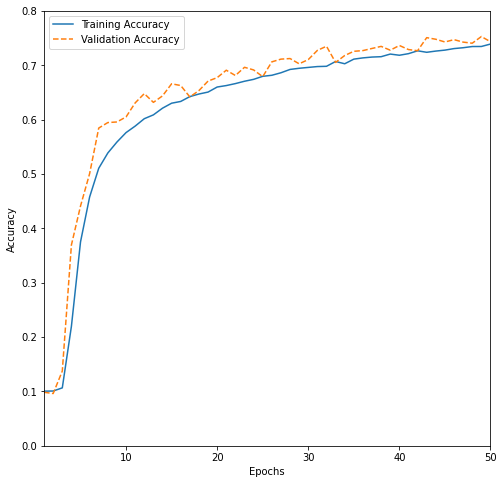

In [29]:
# plotting the accuracies

dict_hist2 = history_model_2.history
list_ep2 = [i for i in range(1,51)]

plt.figure(figsize = (8,8))
plt.plot(list_ep2, dict_hist2['accuracy'], ls='-', label='Training Accuracy')
plt.plot(list_ep2, dict_hist2['val_accuracy'], ls='--', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.axis([1, 50, 0, 0.8])
plt.legend()
plt.show()

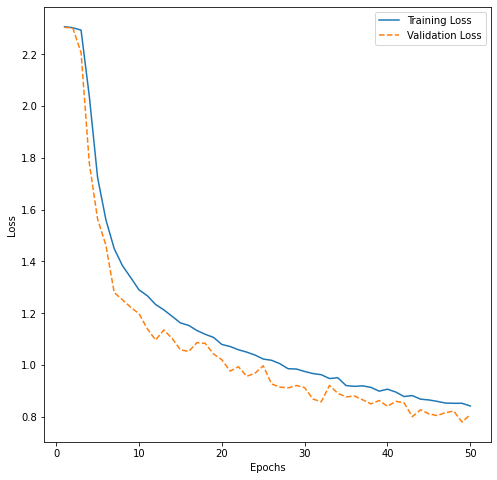

In [25]:
# plotting the losses

plt.figure(figsize = (8,8))
plt.plot(list_ep2, dict_hist2['loss'], ls='-', label='Training Loss')
plt.plot(list_ep2, dict_hist2['val_loss'], ls='--', label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [27]:
# Make predictions based on test set
ypred2 = model2.predict(X_test)
ypred2cl = np.argmax(ypred2, axis=1)

In [28]:
# Accuracy score

accuracy_score(y_test1, ypred2cl)

0.7473888888888889

The accuracy of model2 is worse than model_1. In this case, the model is not overfitting, and Dropout layers do not help.

In [31]:
# Try with different layers but without Dropout

def nn_model_3():
    # create model
    model3 = Sequential()  
   
    #First hidden layer with 256 nodes and relu activation
    model3.add(Dense(256, activation='relu'))
    #Second hidden layer with 128 nodes and relu activation
    model3.add(Dense(128, activation='relu'))
   
    #Third hidden layer with 64 nodes and relu activation
    model3.add(Dense(64, activation='relu'))
    #4th hidden layer with 32 nodes and relu activation
    model3.add(Dense(32,activation='relu'))
    
    #Output layer
    model3.add(Dense(10, activation='softmax'))
    # Compile model
    # Categorical_crossentropy loss, adam optimizer (lr = 0.001) and accuracy metric
    adam = optimizers.Adam(lr=1e-3)
    model3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model3

In [32]:
model3 = nn_model_3()

In [35]:
history_model_3 = model3.fit(X_train, y_train, validation_split=0.2, batch_size=128, verbose=1, epochs=40)

Epoch 1/40
263/263 [==============================] - 1s 4ms/step - loss: 2.3039 - accuracy: 0.1039 - val_loss: 2.2578 - val_accuracy: 0.1164
Epoch 2/40
263/263 [==============================] - 1s 3ms/step - loss: 2.0376 - accuracy: 0.2299 - val_loss: 1.7771 - val_accuracy: 0.3581
Epoch 3/40
263/263 [==============================] - 1s 3ms/step - loss: 1.6330 - accuracy: 0.4170 - val_loss: 1.5502 - val_accuracy: 0.4580
Epoch 4/40
263/263 [==============================] - 1s 3ms/step - loss: 1.4370 - accuracy: 0.5088 - val_loss: 1.3530 - val_accuracy: 0.5555
Epoch 5/40
263/263 [==============================] - 1s 3ms/step - loss: 1.2986 - accuracy: 0.5750 - val_loss: 1.2199 - val_accuracy: 0.6073
Epoch 6/40
263/263 [==============================] - 1s 3ms/step - loss: 1.1933 - accuracy: 0.6179 - val_loss: 1.1732 - val_accuracy: 0.6152
Epoch 7/40
263/263 [==============================] - 1s 3ms/step - loss: 1.1227 - accuracy: 0.6451 - val_loss: 1.1241 - val_accuracy: 0.6500
Epoch 

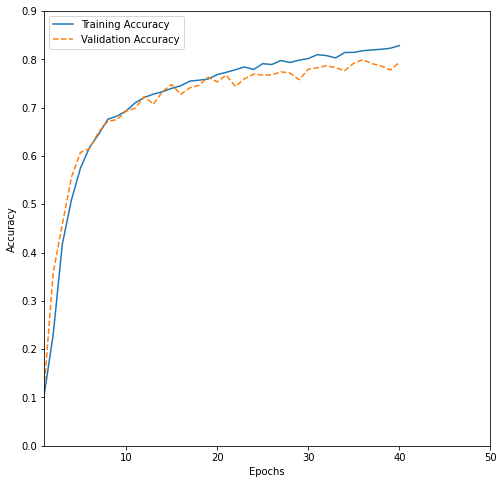

In [39]:
# plotting the accuracies

dict_hist3 = history_model_3.history
list_ep3 = [i for i in range(1,41)]

plt.figure(figsize = (8,8))
plt.plot(list_ep3, dict_hist3['accuracy'], ls='-', label='Training Accuracy')
plt.plot(list_ep3, dict_hist3['val_accuracy'], ls='--', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.axis([1, 50, 0, 0.9])
plt.legend()
plt.show()

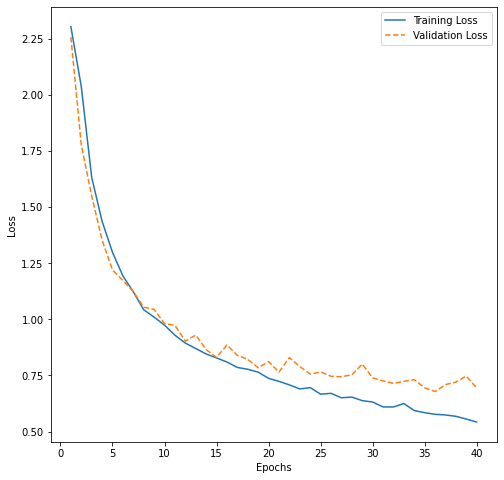

In [41]:
# plotting the loss

plt.figure(figsize = (8,8))
plt.plot(list_ep3, dict_hist3['loss'], ls='-', label='Training Loss')
plt.plot(list_ep3, dict_hist3['val_loss'], ls='--', label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [42]:
# Prediction based on test set

ypred3 = model3.predict(X_test)
ypred3cl = np.argmax(ypred3, axis=1)

# Accuracy score
accuracy_score(y_test1, ypred3cl)

0.789

The accuracy of model3 is a little better than model_1. The accuracy could be further improved by running over more epochs, as the plots show that the validation loss is still decreasing.